<a href="https://colab.research.google.com/github/Madhusudhanbandi/EVA-S14-S15A/blob/master/EVA_S14_ASSIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [94]:
%cd '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth'


/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth


In [0]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.0+cu101 CPU


In [0]:
!python test.py  --st 40000 --sp 42000 --bs 20

Using TensorFlow backend.
Loading model...

Model loaded (nyu.h5).
tcmalloc: large alloc 2408448000 bytes == 0xaa122000 @  0x7f00ad1f81e7 0x7f00a9c2d5e1 0x7f00a9c91c78 0x7f00a9c91d93 0x7f00a9d2fea8 0x7f00a9d30704 0x7f00a9d30852 0x566d63 0x59fc4e 0x7f00a9c7d4ed 0x50a2bf 0x50bfb4 0x507d64 0x509a90 0x50a48d 0x50cd96 0x507d64 0x588e5c 0x59fc4e 0x7f00a9c7d4ed 0x50a2bf 0x50bfb4 0x507d64 0x509a90 0x50a48d 0x50cd96 0x509758 0x50a48d 0x50bfb4 0x507d64 0x50ae13

Loaded (2000) images of size (224, 224, 3).
2000


In [0]:
import zipfile
out_depthimages = zipfile.ZipFile('depth_images.zip', mode='a', compression=zipfile.ZIP_STORED)
out_bgfgimages = zipfile.ZipFile('bgfg_images.zip', mode='a', compression=zipfile.ZIP_STORED)
out_maskimages = zipfile.ZipFile('fgmask_images.zip', mode='a', compression=zipfile.ZIP_STORED)




In [0]:

""" ----------- Read all images --------------------"""

import os
import cv2
import sys
import glob
import random
import numpy as np
import matplotlib

images_bg= glob.glob("/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/background/*")

images_fg= glob.glob("/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/foreground/*")

for_mask= glob.glob("/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/foreground_mask/*")

target="/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/overlay_bg_fg/"

maskpath="/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/overlay_mask/"



images_bg_sub=images_bg[50:100]
from PIL import Image
import zipfile
# out_depthimages = zipfile.ZipFile('depth_images.zip', mode='a', compression=zipfile.ZIP_STORED)
out_bgfgimages = zipfile.ZipFile('bgfg_images.zip', mode='a', compression=zipfile.ZIP_STORED)
out_maskimages = zipfile.ZipFile('fgmask_images.zip', mode='a', compression=zipfile.ZIP_STORED)


from pathlib import Path

Path(f'overlayed_bg_fg/').mkdir(parents=True, exist_ok=True)
Path(f'overlayed_mask/').mkdir(parents=True, exist_ok=True)
# Path(f'depth_map/').mkdir(parents=True, exist_ok=True)

import time
start = time.process_time()

for bg in images_bg_sub:

  out_bgfgimages = zipfile.ZipFile('bgfg_images.zip', mode='a', compression=zipfile.ZIP_STORED)
  out_maskimages = zipfile.ZipFile('fgmask_images.zip', mode='a', compression=zipfile.ZIP_STORED)

  for fg in images_fg:
    filen = fg.split('foreground/')[1]
    fi = filen.split('.png')[0]
    fg_mask=Image.open('/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/foreground_mask/'+fi+'_M.jpg')
    for i in range(20):
			#reading background image
      src = Image.open(bg)
      h1,w1=src.size

      filename = bg.split('background/')[1]
      file = filename.split('.jpg')[0]
			
			#reading overlay image
      overlay = Image.open(fg)
      lay = cv2.imread(fg,cv2.IMREAD_UNCHANGED)
      h2,w2=overlay.size

      filenam = fg.split('foreground/')[1]
      fil = filenam.split('.png')[0]
			
			#initializing random numbers for position to place overlay image
      m=random.randint(1,(h1-h2))
			# print(h1,h2,m)
      n=random.randint(1,(w1-w2))
      src.paste(overlay,(m,n),overlay)
      
      src.save('b_temp.jpg',optimize=True,quality=30)

              
			
			#Creating mask
      mask =Image.new('L',src.size)

      mask.paste(fg_mask,(m,n),fg_mask)
			
      mask.save('m_temp.jpg',optimize=True,quality=30)
        
      # save the files to .zip file
      out_bgfgimages.write('b_temp.jpg', f'overlayed_bg_fg/{file+"_"+fil+"_"+str(i+1)+".jpg"}')
      out_maskimages.write('m_temp.jpg', f'foreground_mask/{file+"_"+fil+"_"+str(i+1)+"_M.jpg"}')
                

      del mask,src,overlay
  out_bgfgimages.close()
  out_maskimages.close()

  print("Generated overlay,mask for",file)
  print(time.process_time() - start)




Generated overlay,mask for B53
32.79850071499982
Generated overlay,mask for B49
65.62571461499988
Generated overlay,mask for B57
97.86103039499994
Generated overlay,mask for B36
130.87488706099998
Generated overlay,mask for B38
164.56828115199983
Generated overlay,mask for B47
197.6640377639999
Generated overlay,mask for B65
229.60783980399992
Generated overlay,mask for B54
262.4364383279999
Generated overlay,mask for B45
294.94776951999984
Generated overlay,mask for B37
328.39277331899984
Generated overlay,mask for B64
361.265134665
Generated overlay,mask for B72
393.919397677
Generated overlay,mask for B73
427.668475556
Generated overlay,mask for B8
461.268539811
Generated overlay,mask for B56
494.5597474269998
Generated overlay,mask for B87
528.9997557009999
Generated overlay,mask for B89
564.1406583569999
Generated overlay,mask for B82
598.7330651609998
Generated overlay,mask for B77
633.783019922
Generated overlay,mask for B74
668.204437874
Generated overlay,mask for B80
702.44786

In [56]:

import os
import cv2
import sys
import glob
import random
import numpy as np
import matplotlib

images_bg= glob.glob("/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/background/*")

images_fg= glob.glob("/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag/*")

for_mask= glob.glob("/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag1/*")

bglis=[]
for image in images_bg:
  imgs=image.split('/')[-1]
  img=imgs.split('.jpg')[0]
  if img in ["B17","B18","B19","B20","B21","B22","B23","B24","B25","B26"]:
    bglis.append(image)

fglis=[]
for image in images_fg:
  imgs=image.split('/')[-1]
  img=imgs.split('.jpg')[0]
  if img in ["F1","F2","F64","F66","F86","F16","F12","F8","F6","F32"]:
    fglis.append(image)

masklis=[]
for image in for_mask:
  imgs=image.split('/')[-1]
  img=imgs.split('.jpg')[0]
  if img in ["F1","F2","F64","F66","F86","F16","F12","F8","F6","F32"]:
    masklis.append(image)
# # print(fglis)
fglist=sorted(fglis)
print(fglist)
masklist=sorted(masklis)
print(masklist)


['/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag/F1.jpg', '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag/F12.jpg', '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag/F16.jpg', '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag/F2.jpg', '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag/F32.jpg', '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag/F6.jpg', '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag/F64.jpg', '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag/F66.jpg', '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag/F8.jpg', '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag/F86.jpg']
['/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag1/F1.jpg', '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag1/F12.jpg', '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag1/F16.jpg', '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/diag1/F

In [84]:

import os
import cv2
import sys
import glob
import random
import numpy as np
import matplotlib
from zipfile import ZipFile

images_bg1="/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/bgfg_images.zip"

images_fg1="/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/fgmask_images.zip"

for_mask1="/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/depthimages.zip"

with ZipFile(images_bg1, 'r') as zip:
    inflist=zip.namelist() 
    bglis1=[]
    for image in inflist:
      imgs=image.split('/')[-1]
      img=imgs.split('.jpg')[0]
      if img in ["B17_F1_6","B17_F2_7","B17_F64_6","B17_F66_4","B17_F86_16","B17_F16_17","B17_F12_2","B17_F8_8","B17_F6_11","B17_F32_5"]:
        bglis1.append(image)

with ZipFile(images_fg1, 'r') as zip:
    inflist=zip.namelist() 
    fglis1=[]
    for image in inflist:
      imgs=image.split('/')[-1]
      img=imgs.split('_M.jpg')[0]
      if img in ["B17_F1_6","B17_F2_7","B17_F64_6","B17_F66_4","B17_F86_16","B17_F16_17","B17_F12_2","B17_F8_8","B17_F6_11","B17_F32_5"]:
        fglis1.append(image)

with ZipFile(for_mask1, 'r') as zip:
    inflist=zip.namelist() 
    inflist1=zip.infolist()
    masklis1=[]
    for image in inflist:
      imgs=image.split('/')[-1]
      img=imgs.split('_D.jpg')[0]
      if img in ["B17_F1_6","B17_F2_7","B17_F64_6","B17_F66_4","B17_F86_16","B17_F16_17","B17_F12_2","B17_F8_8","B17_F6_11","B17_F32_5"]:
        masklis1.append(image)
bglist1=sorted(bglis1)
print(bglist1)
fglist1=sorted(fglis1)
print(fglist1)
masklist1=sorted(masklis1)
print(masklist1)


['overlayed_bg_fg/B17_F12_2.jpg', 'overlayed_bg_fg/B17_F16_17.jpg', 'overlayed_bg_fg/B17_F1_6.jpg', 'overlayed_bg_fg/B17_F2_7.jpg', 'overlayed_bg_fg/B17_F32_5.jpg', 'overlayed_bg_fg/B17_F64_6.jpg', 'overlayed_bg_fg/B17_F66_4.jpg', 'overlayed_bg_fg/B17_F6_11.jpg', 'overlayed_bg_fg/B17_F86_16.jpg', 'overlayed_bg_fg/B17_F8_8.jpg']
['foreground_mask/B17_F12_2_M.jpg', 'foreground_mask/B17_F16_17_M.jpg', 'foreground_mask/B17_F1_6_M.jpg', 'foreground_mask/B17_F2_7_M.jpg', 'foreground_mask/B17_F32_5_M.jpg', 'foreground_mask/B17_F64_6_M.jpg', 'foreground_mask/B17_F66_4_M.jpg', 'foreground_mask/B17_F6_11_M.jpg', 'foreground_mask/B17_F86_16_M.jpg', 'foreground_mask/B17_F8_8_M.jpg']
['depth/B17_F12_2_D.jpg', 'depth/B17_F16_17_D.jpg', 'depth/B17_F1_6_D.jpg', 'depth/B17_F2_7_D.jpg', 'depth/B17_F32_5_D.jpg', 'depth/B17_F64_6_D.jpg', 'depth/B17_F66_4_D.jpg', 'depth/B17_F6_11_D.jpg', 'depth/B17_F86_16_D.jpg', 'depth/B17_F8_8_D.jpg']


In [0]:
from IPython.display import display
from IPython.display import HTML
from PIL import Image
from io import BytesIO
import glob
import random
import base64
import pandas as pd

def get_thumbnail(img):
  i = Image.open(img)
  i.thumbnail((70, 70), Image.LANCZOS)
  return i
  
def get_thumbnail_from_image(img):
  i = img.copy()
  i.thumbnail((70, 70), Image.LANCZOS)
  return i

def image_base64(im):
  if isinstance(im, str):
    im = get_thumbnail(im)
  with BytesIO() as buffer:
    im.save(buffer, 'jpeg')
    return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
  return f'<img style="display:inline;margin:1px" src="data:image/jpeg;base64,{image_base64(im)}">'
  
def preview_images(imglis):
  images = list(map(lambda x:image_formatter(get_thumbnail(x)), imglis))
  display(HTML(''.join(images)))

def preview_images1(imglis):
  images = list(map(lambda x:image_formatter(get_thumbnail(zip.open(x))), imglis))
  display(HTML(''.join(images)))


1) Background images



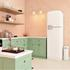
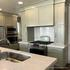
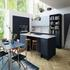
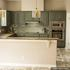
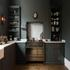
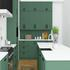
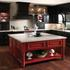
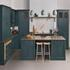
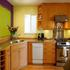
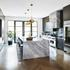

2) Foreground images



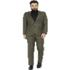
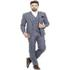
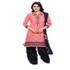
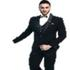
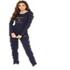
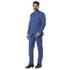
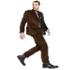
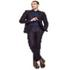
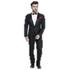
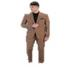

3) Foreground mask images



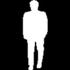
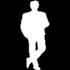
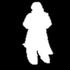
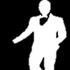
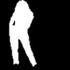
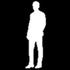
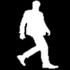
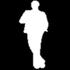
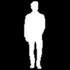
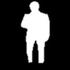

4) Overlayed foreground on background images



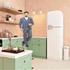
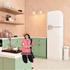
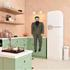
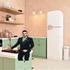
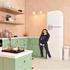
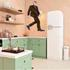
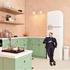
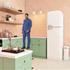
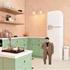
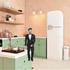

5) Overlayed mask images



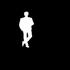
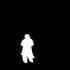
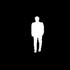
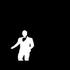
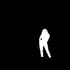
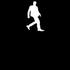
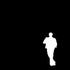
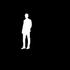
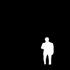
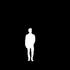

5) Depth Images



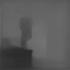
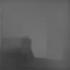
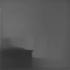
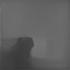
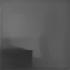
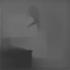
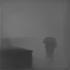
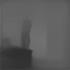
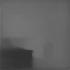
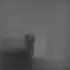

In [92]:

print("1) Background images")
preview_images(bglis)
print("2) Foreground images")
preview_images(fglist)
print("3) Foreground mask images")
preview_images(masklist)
print("4) Overlayed foreground on background images")
with ZipFile(images_bg1, 'r') as zip:
    inflist=zip.namelist() 
    preview_images1(bglist1)
print("5) Overlayed mask images")
with ZipFile(images_fg1, 'r') as zip:
    inflist=zip.namelist() 
    preview_images1(fglist1)
print("5) Depth Images")
with ZipFile(for_mask1, 'r') as zip:
    inflist=zip.namelist() 
    preview_images1(masklist1)